# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined= pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
combined.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
combined.nunique()

Mouse ID               249
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicate=combined[combined.duplicated(subset=[ 'Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = combined.loc[combined.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates=combined.set_index('Mouse ID')
duplicates.loc['g989']


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean=duplicates.drop(['g989'])
clean.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
b128,5,45.651331,0,Capomulin,Female,9,22
b128,10,43.270852,0,Capomulin,Female,9,22
b128,15,43.784893,0,Capomulin,Female,9,22
b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data=clean.reset_index()
clean_data.nunique()

Mouse ID               248
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
statistics=clean_data.groupby(['Drug Regimen'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
statistics_avg = statistics['Tumor Volume (mm3)'].mean()
statistics_median = statistics['Tumor Volume (mm3)'].median()
statistics_var = statistics['Tumor Volume (mm3)'].var()
statistics_std= statistics['Tumor Volume (mm3)'].std()
statistics_sem= statistics['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({
        "Mean": statistics_avg,
        "Median" : statistics_median,
        "Variance": statistics_var,
        "Standar Deviation": statistics_std,
        "SEM": statistics_sem
})
summary_df
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

,Mean,Median,Variance,Standar Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
clean.loc[:,'Tumor Volume (mm3)'] = pd.to_numeric(clean['Tumor Volume (mm3)'])
statistics=clean.groupby('Drug Regimen')['Tumor Volume (mm3)']
summary_by_regimen = statistics.agg(['mean', 'median','var','std', 'sem'])
summary_by_regimen

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

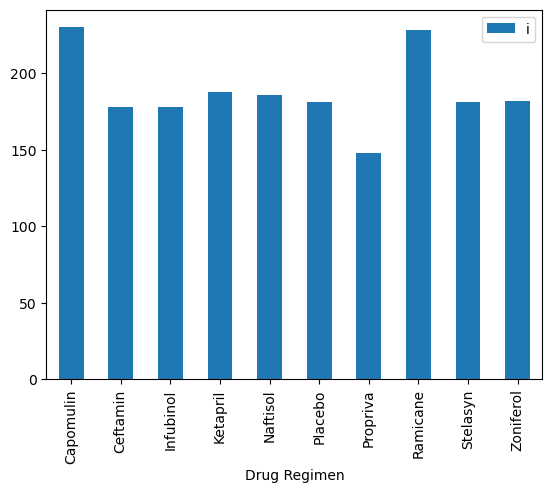

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
for i in statistics:
    Rows=statistics.count()
    Dictionary={'i':Rows}
    df = pd.DataFrame(Dictionary, columns=['i'])
df

df.plot(kind='bar')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

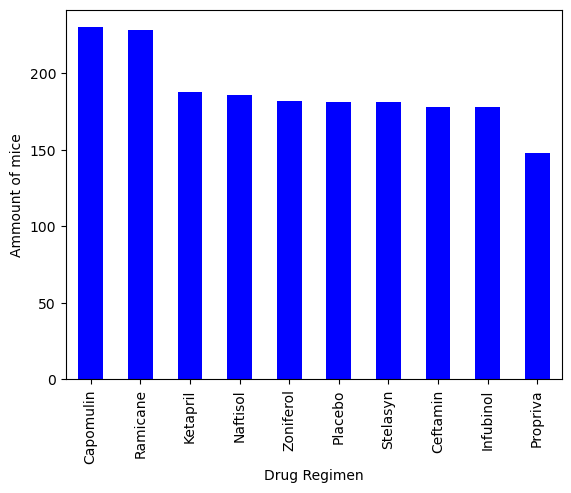

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Rows=statistics.count().sort_values(ascending=False)
figure1=Rows.plot(kind="bar", color=["blue"],
                        xlabel="Drug Regimen",
                        ylabel="Ammount of mice")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

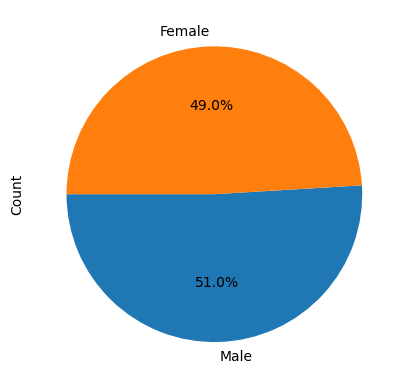

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_counts=clean_data['Sex'].value_counts()

sex_data = {'Sex': sex_counts.index,
            'Count': sex_counts.values}
df=pd.DataFrame(sex_data)
df.plot(y='Count', labels=df['Sex'], kind='pie', autopct='%1.1f%%', startangle=180, legend=False)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

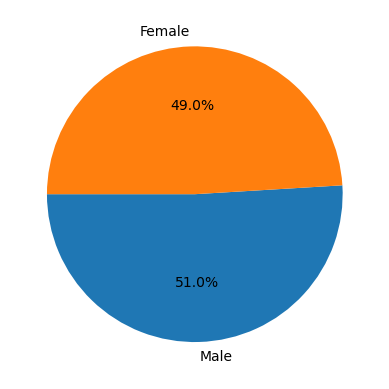

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts=clean_data['Sex'].value_counts()

Sex= sex_counts.index
Count = sex_counts.values

plt.pie(Count, labels=Sex, autopct='%1.1f%%', startangle=180)
plt.show

## Quartiles, Outliers and Boxplots

In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final = clean.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
final_df=pd.DataFrame(final)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge2=pd.merge(clean,final_df, on=['Mouse ID', 'Timepoint'], how='left')
merge2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [95]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_val = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    t_data = clean[clean['Drug Regimen'] == treatment]['Tumor Volume (mm3)'].values
    
    # Check if the array is not empty
    if len(t_data) > 0:
        tumor_val.append({'Drug Regimen': [treatment] * len(t_data), 'Tumor Volume (mm3)': t_data})

# Concatenate tumor volume data into a single DataFrame
tumor_val_df = pd.DataFrame({'Drug Regimen': [item for sublist in tumor_val for item in sublist['Drug Regimen']],
                             'Tumor Volume (mm3)': [item for sublist in tumor_val for item in sublist['Tumor Volume (mm3)']]})

# Display DataFrame
print(tumor_val_df)

    Drug Regimen  Tumor Volume (mm3)
0      Capomulin           45.000000
1      Capomulin           45.651331
2      Capomulin           43.270852
3      Capomulin           43.784893
4      Capomulin           42.731552
..           ...                 ...
809     Ceftamin           52.430066
810     Ceftamin           54.952226
811     Ceftamin           59.253484
812     Ceftamin           64.192341
813     Ceftamin           45.000000

[814 rows x 2 columns]


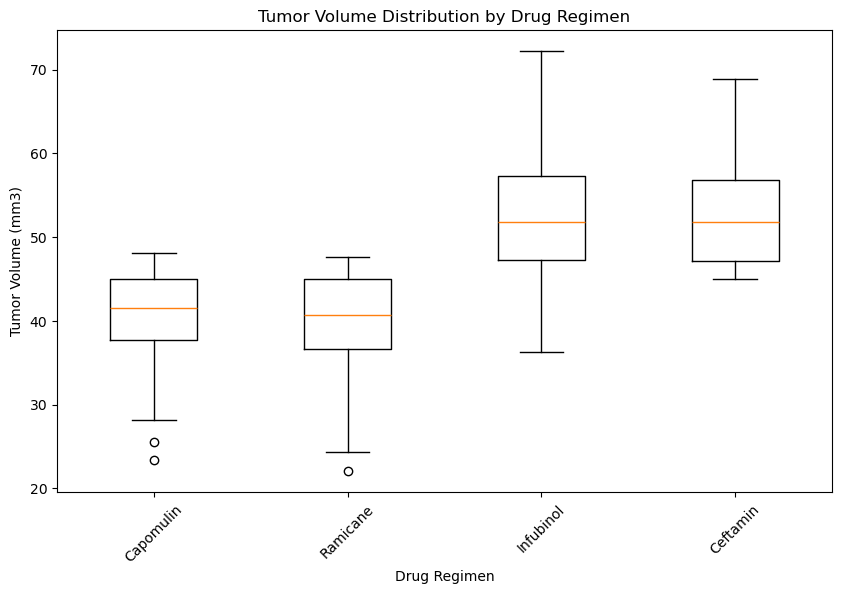

In [97]:
plt.figure(figsize=(10, 6))
plt.boxplot([tumor_val_df[tumor_val_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments],
            labels=treatments)
plt.title('Tumor Volume Distribution by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Line and Scatter Plots

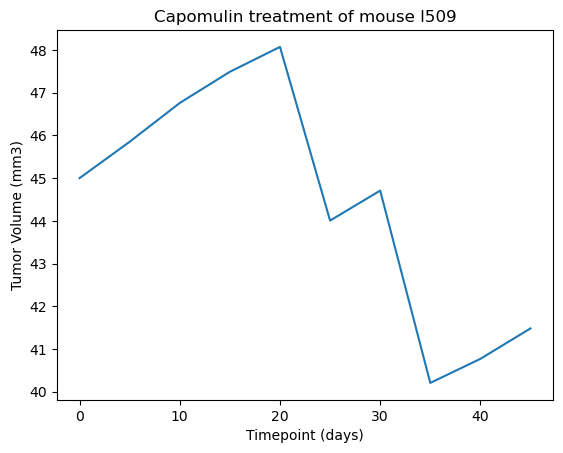

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


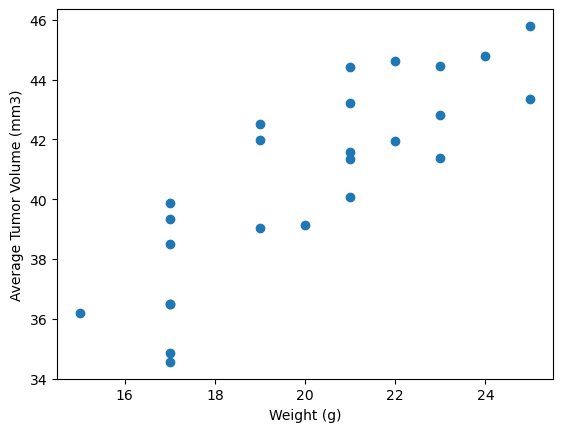

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


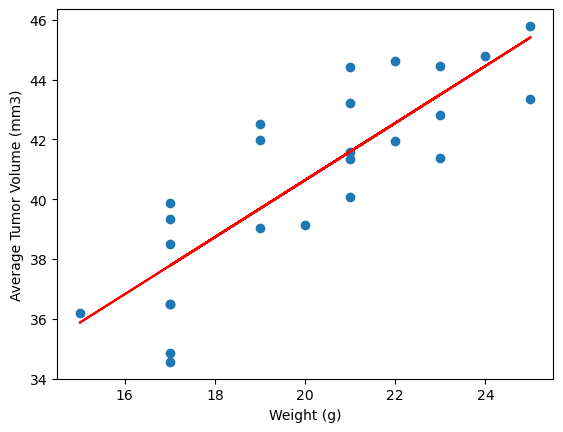

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
